In [42]:
import pandas as pd
ds = pd.read_csv("C:\\Users\\sarve\\Downloads\\117_1001_bundle_archive\\responses.csv")
ds.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


# 1 Empathy Target

In [43]:
val = ds.values
Empathy_column = ds.columns.get_loc("Empathy")
Y_temp = val[:,Empathy_column]
Y_temp = Y_temp > 3
Y = Y_temp.astype(int)

<ipython-input-43-3a582c95a6ba>:4: RuntimeWarning: invalid value encountered in greater
  Y_temp = Y_temp > 3


In [44]:
##One hot encoding
ds_onehot = ds.copy()
ds_onehot = pd.get_dummies(ds_onehot, columns = ["Smoking", "Alcohol", "Punctuality", "Lying", "Internet usage", "Gender", "Left - right handed", "Education", "Only child", "Village - town", "House - block of flats"], prefix= ["Smoking", "Alcohol", "Punctuality", "Lying", "Internet usage", "Gender", "", "Education", "Only child", "Village - town", "House"])

ds_onehot.drop(["Empathy"], axis = 1, inplace = True)

ds_onehot['Empathy'] = Y

In [45]:
ds_onehot.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Education_masters degree', 'Education_primary school',
       'Education_secondary school', 'Only child_no', 'Only child_yes',
       'Village - town_city', 'Village - town_village', 'House_block of flats',
       'House_house/bungalow', 'Empathy'],
      dtype='object', length=173)

In [46]:
#missing data
l_temp = ds_onehot.keys()
label = l_temp.values
ds_onehot = ds_onehot.fillna(ds_onehot.median())

In [47]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
Chi2_Select = SelectKBest(chi2, k=100)
fit = Chi2_Select.fit(ds_onehot.drop(['Empathy'], axis = 1), ds_onehot['Empathy'])
features_chi = fit.transform(ds_onehot.drop(['Empathy'], axis = 1))


In [48]:
standardized_X = preprocessing.scale(features_chi)
print("Standardized Data")
print(standardized_X)

Standardized Data
[[ 0.40327265 -0.95305449 -1.13332642 ...  0.58268563 -0.57963681
   1.54205266]
 [-1.10526579 -0.95305449 -1.13332642 ...  0.58268563 -0.57963681
  -0.64848628]
 [ 0.40327265 -0.95305449 -0.25281897 ...  0.58268563 -0.57963681
  -0.64848628]
 ...
 [-1.10526579 -1.80944688 -1.13332642 ... -1.71619128  1.72521823
  -0.64848628]
 [ 0.40327265 -0.09666211  0.62768848 ...  0.58268563 -0.57963681
  -0.64848628]
 [ 0.40327265  0.75973027  0.62768848 ...  0.58268563 -0.57963681
   1.54205266]]


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(standardized_X, ds_onehot['Empathy'], test_size = 0.20, random_state = 15, stratify = ds_onehot['Empathy'])

In [50]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
DT2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DT2.fit(standardized_X, ds_onehot['Empathy'])

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [51]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
DT = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
DT.fit(X_train, Y_train)
y_train_hat_DT = DT.predict(X_train)
y_test_hat_DT = DT.predict(X_test)
print(DT)
print("Training accuracy", DT.score(X_train, Y_train))
print("Test data accuracy", DT.score(X_test, Y_test))
print(confusion_matrix(Y_test, y_test_hat_DT))
print(classification_report(Y_test,y_test_hat_DT))

DecisionTreeClassifier(criterion='entropy', max_depth=7)
Training accuracy 0.879950495049505
Test data accuracy 0.6831683168316832
[[39 30]
 [34 99]]
              precision    recall  f1-score   support

           0       0.53      0.57      0.55        69
           1       0.77      0.74      0.76       133

    accuracy                           0.68       202
   macro avg       0.65      0.65      0.65       202
weighted avg       0.69      0.68      0.69       202



In [52]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(criterion ='gini', n_estimators = 100, max_depth = 7)
RF.fit(X_train, Y_train)
Y_train_hat_RF = RF.predict(X_train)
Y_test_hat_RF = RF.predict(X_test)
print(RF)
print("Training accuracy", RF.score(X_train, Y_train))
print("Testing accuracy", RF.score(X_test, Y_test))
print(confusion_matrix(Y_test, Y_test_hat_RF))
print(classification_report(Y_test,Y_test_hat_RF))

RandomForestClassifier(max_depth=7)
Training accuracy 0.926980198019802
Testing accuracy 0.7227722772277227
[[ 17  52]
 [  4 129]]
              precision    recall  f1-score   support

           0       0.81      0.25      0.38        69
           1       0.71      0.97      0.82       133

    accuracy                           0.72       202
   macro avg       0.76      0.61      0.60       202
weighted avg       0.75      0.72      0.67       202



In [53]:
from sklearn.tree import export_graphviz
export_graphviz(DT2, 'tree.dot')

In [54]:
! dot -Tpng tree.dot -o tree.png

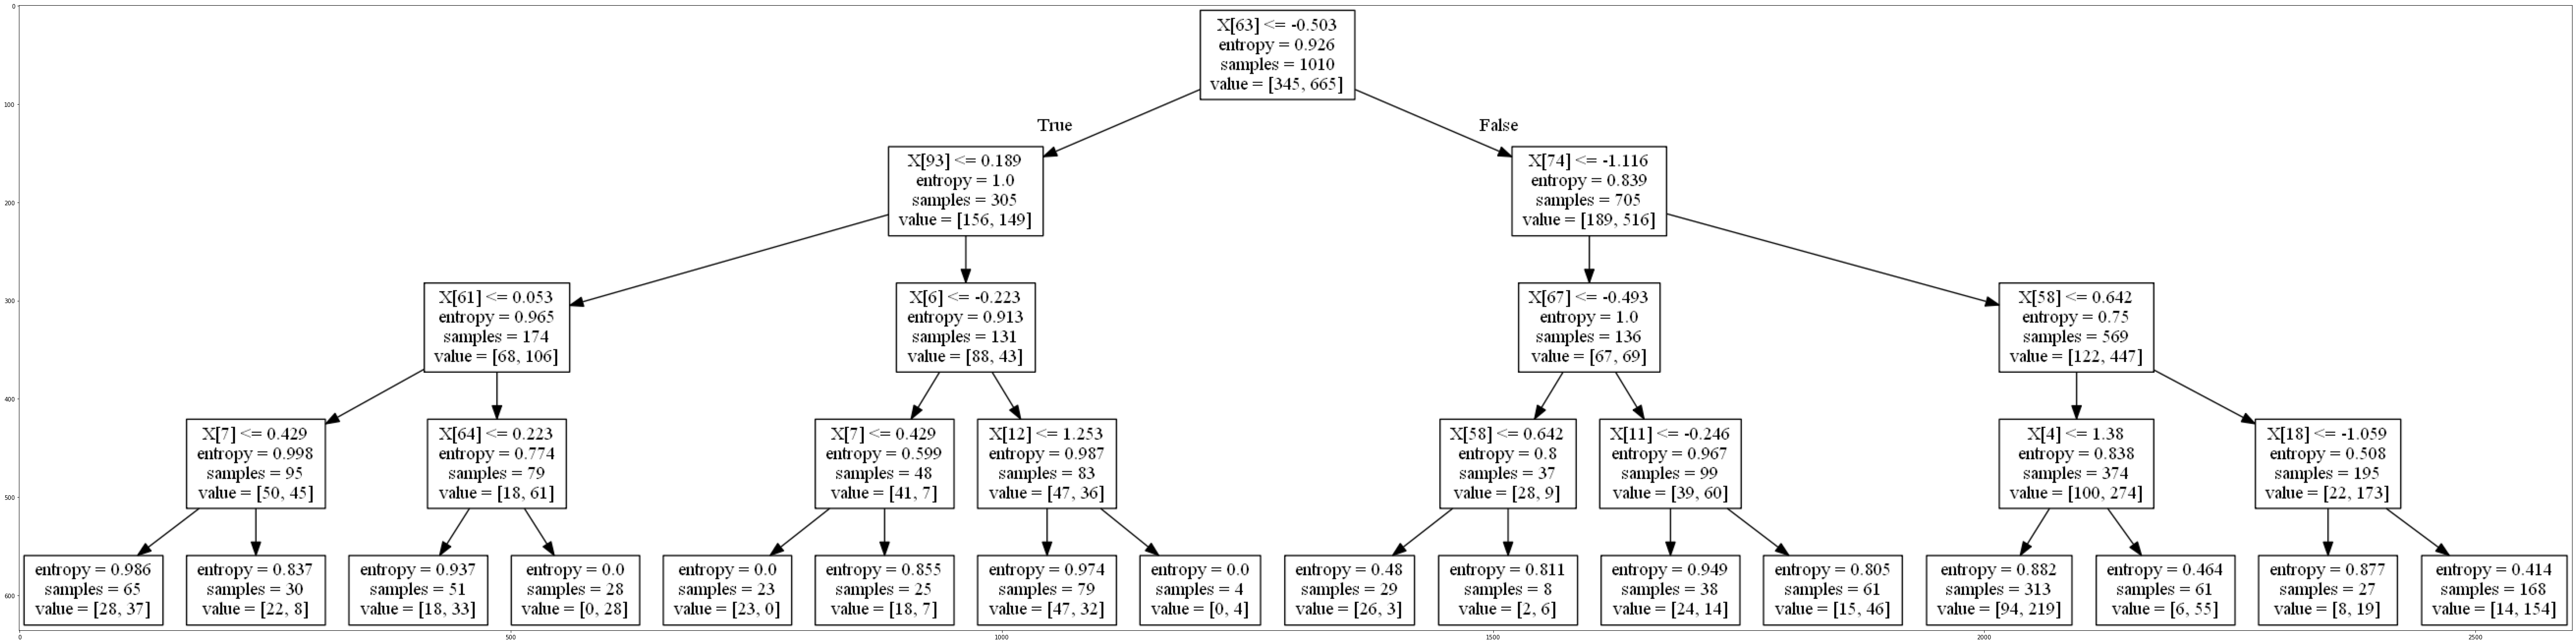

In [57]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree.png')
plt.figure(figsize = (80,80 ))
plt.imshow(img)

In [1]:
#shopping

In [23]:
x2=ds[['Finances','Shopping centres','Branded clothing','Entertainment spending','Spending on looks','Spending on healthy eating']]

In [24]:
y2=ds['Gender']

In [25]:
y2 = y2.astype('category')

In [26]:
y2 = y2.cat.codes

In [27]:
def mis_cat(series):
    mode=series.value_counts().index[0]
    series=series.fillna(mode)
    return series

In [28]:
y2=mis_cat(y2)

In [29]:
y2.isnull().sum()

0

In [30]:
for x in x2:
    x2[x]=mis_cat(x2[x])

<ipython-input-30-98433654196a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[x]=mis_cat(x2[x])


In [31]:
x2.isnull().sum()

Finances                      0
Shopping centres              0
Branded clothing              0
Entertainment spending        0
Spending on looks             0
Spending on healthy eating    0
dtype: int64

In [169]:
for x in x2:
    x2[x]=x2[x].astype('float')

<ipython-input-169-75380b79a5f9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[x]=x2[x].astype('float')


In [194]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Finances                    1010 non-null   float64
 1   Shopping centres            1010 non-null   float64
 2   Branded clothing            1010 non-null   float64
 3   Entertainment spending      1010 non-null   float64
 4   Spending on looks           1010 non-null   float64
 5   Spending on healthy eating  1010 non-null   float64
dtypes: float64(6)
memory usage: 47.5 KB


In [162]:
np.any(np.isnan(y2))

False

In [160]:
import numpy as np

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x2, y2, test_size = 0.20, random_state = 15)

In [164]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
DT = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)
DT.fit(X_train, Y_train)
y_train_hat_DT = DT.predict(X_train)
y_test_hat_DT = DT.predict(X_test)
print(DT)
print("Training accuracy", DT.score(X_train, Y_train))
print("Test data accuracy", DT.score(X_test, Y_test))
print(confusion_matrix(Y_test, y_test_hat_DT))
print(classification_report(Y_test,y_test_hat_DT))

DecisionTreeClassifier(criterion='entropy', max_depth=7)
Training accuracy 0.75
Test data accuracy 0.6534653465346535
[[ 0  1  1]
 [ 0 99 27]
 [ 0 41 33]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.70      0.79      0.74       126
           1       0.54      0.45      0.49        74

    accuracy                           0.65       202
   macro avg       0.41      0.41      0.41       202
weighted avg       0.64      0.65      0.64       202



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [195]:
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
DT3 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)
DT3.fit(x2, y2)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [196]:
from sklearn.tree import export_graphviz
export_graphviz(DT3, 'tree2.dot')

In [203]:
!dot -Tpng tree2.dot -o tree2.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


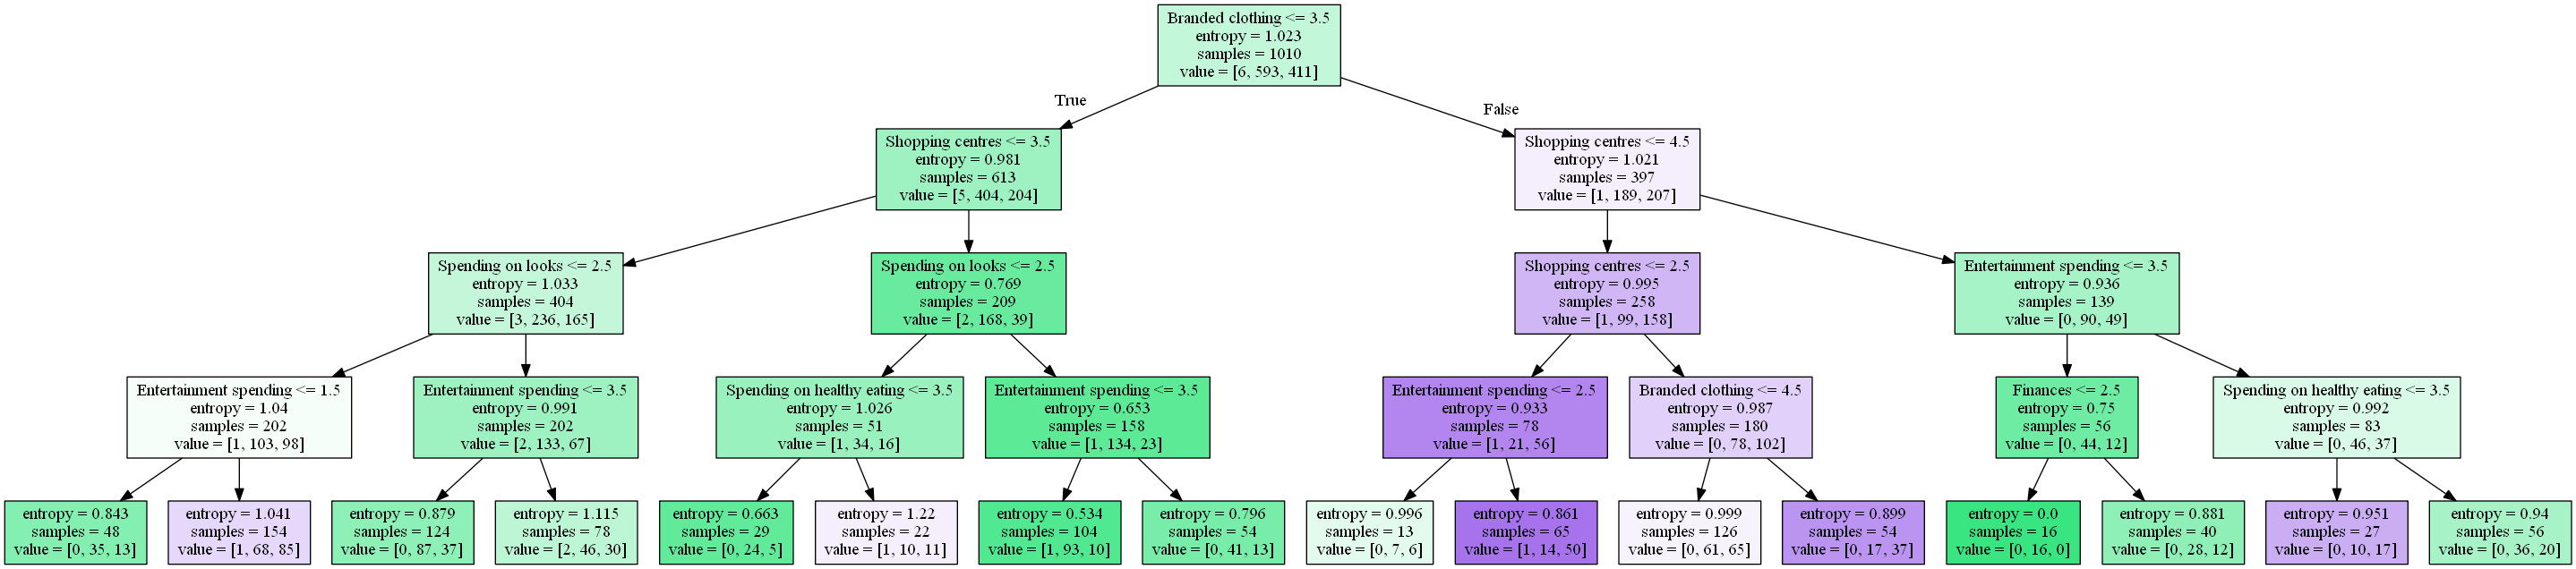

In [40]:
import matplotlib.pyplot as plt
import cv2
dt_feature_names = list(x2.columns)
dt_target_names = np.array(y2.unique(),dtype=np.string_) 
tree.export_graphviz(DT3, out_file='tree2.dot', 
    feature_names= dt_feature_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree2.dot')
Image(graph.create_png())

In [205]:
!dot tree2.dot -Tpng -o image.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [208]:
##DT3 SMOKING

In [4]:
ds = pd.get_dummies(columns=['Smoking', 'Punctuality', 'Lying',
                           'Internet usage', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats'],data=ds)

In [5]:
def JNum(Job_String):
    if Job_String == 'never':
        return 0
    elif Job_String == 'social drinker':
        return 1
    else:
        return 2

In [6]:
ds['Alcohol2'] = ds['Alcohol'].apply(JNum)

In [7]:
X = ds.drop(['Alcohol2','Alcohol'],axis=1)

In [8]:
Y = ds['Alcohol2']

In [10]:
#missing data
l_temp = X.keys()
label = l_temp.values
X = X.fillna(X.median())

In [12]:
from sklearn import tree
dt4 = tree.DecisionTreeClassifier(max_depth=3)

In [13]:
dt4.fit(X,Y)

DecisionTreeClassifier(max_depth=3)

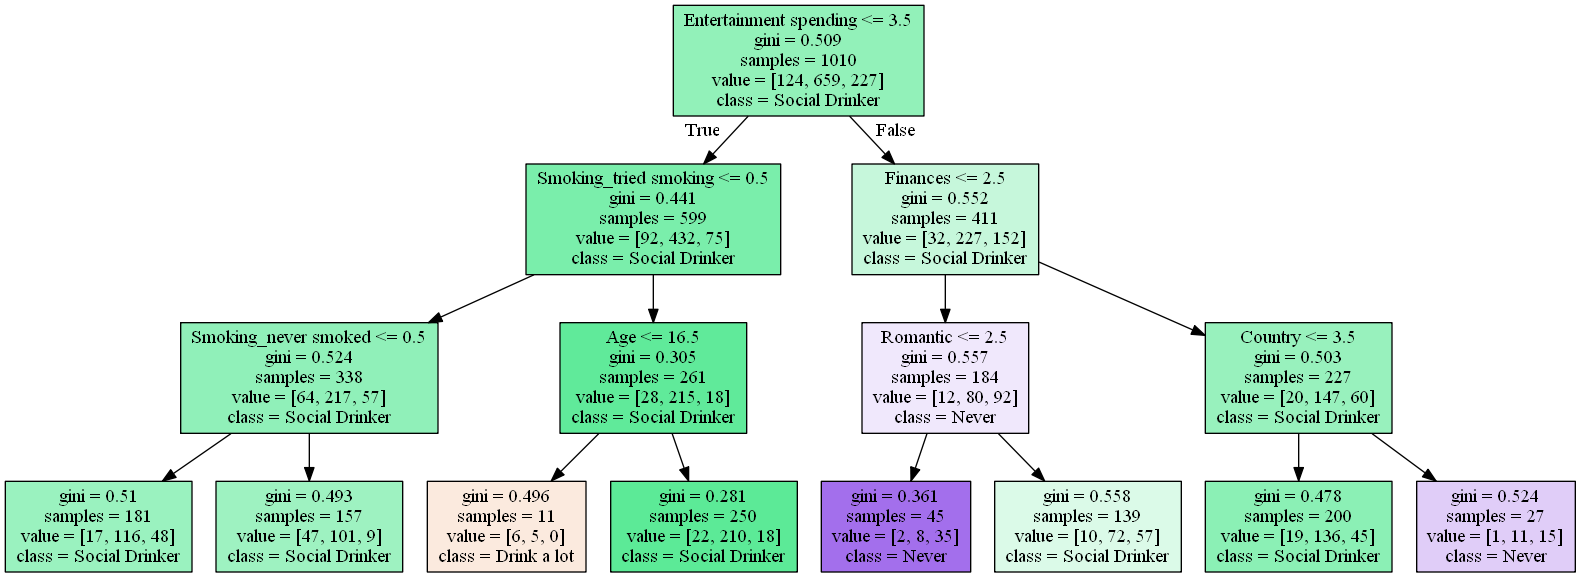

In [15]:
import numpy as np
import pydotplus
from IPython.display import Image
import sklearn.tree as tree
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.string_) 
tree.export_graphviz(dt4, out_file='tree3.dot', 
    feature_names= dt_feature_names, 
    class_names = [  'Social Drinker' if i == 1 else  'Never' if i == 2 else 'Drink a lot' for i in dt4.classes_],
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree3.dot')
Image(graph.create_png())